In [3]:
import sys,os
sys.path.append('..')
sys.path.append('../..')
from backtester import matlab, backtester
from backtester.analysis import *
from backtester.swarms.manager import SwarmManager
from backtester.exoinfo import EXOInfo

import pandas as pd
import numpy as np
import scipy

In [4]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
swarms = {}
for file in os.listdir('./temp_swarms/'):
    swarm_name = file.replace('.swm','')
    swarms[swarm_name] = SwarmManager.load(os.path.join('temp_swarms', file))

In [6]:
campaign_dict = {}
for swarm_name, smgr in swarms.items():
        smgr = swarms[swarm_name]
        campaign_dict[swarm_name] = smgr.swarm_picked.sum(axis=1)
   
    
campaign_portfolio = pd.DataFrame(campaign_dict)

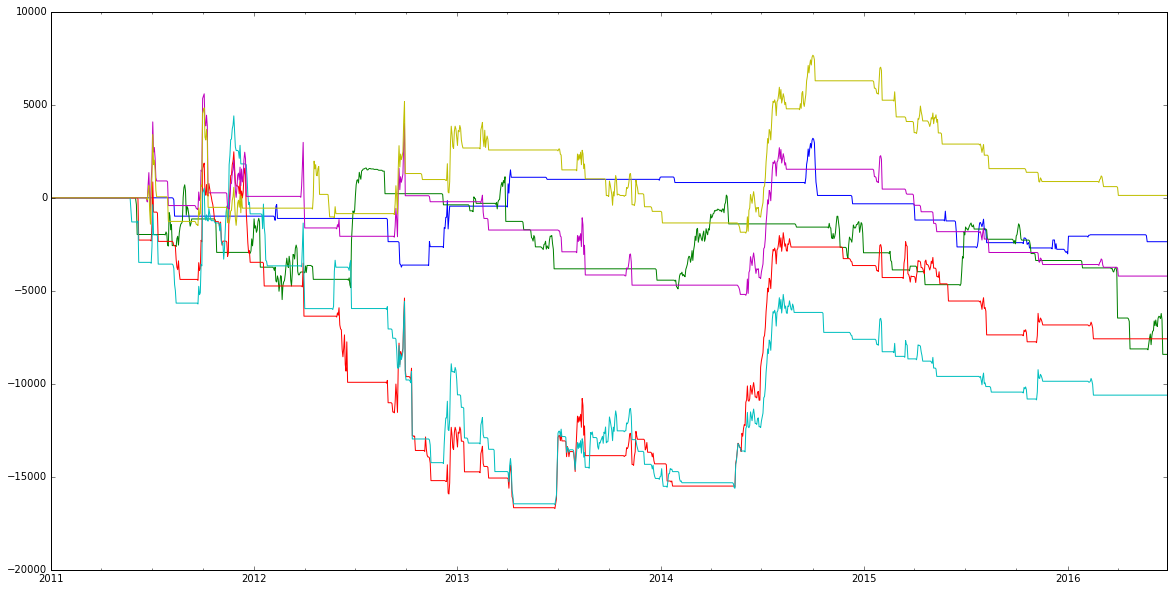

In [7]:
figsize(20,10)
campaign_portfolio.plot(legend=False)

## Rng strategies

In [8]:
#
# random time series
#
df = pd.DataFrame()
for i in range(10):
    
    date = pd.date_range(start='2015-01', end='2016-10', freq='D')
    price = np.random.randint(-100, 101, size=len(date))
    
    ser = pd.Series(price, index=date, name='rng_system'+str(i))
    df['rng_system'+str(i)] = ser.cumsum()

## Select input DF. Real swarms or RNG pseudo strategies

In [25]:
# Real swarms
#df = campaign_portfolio

# Rng strategies
#df = df

# Real swarms from DF
df = pd.read_csv('./swarms_df/ichi_swarm_1.csv', parse_dates=[0],
                dayfirst=True, index_col=0).asfreq('D')

In [26]:
df.dropna().plot()

## Systems overall performance estimation

In [27]:
temp_l = []

for strat in df.columns:

        input_strategy_data = df[strat] # This data is used in metrics calc

        price_change = input_strategy_data.diff()
        max_dd = (input_strategy_data - input_strategy_data.expanding().max()).min()
        netprofit = df[strat].ix[-1] - df[strat].ix[0]

        # Since swarm PnL statistics is not trade-by-trade
        # For PF calc I used cumulative values of positive and negatives price changes
        # Same for winrate
        profit_factor = price_change[price_change > 0].sum() / np.abs(price_change[price_change < 0].sum())

        winrate = (price_change[price_change > 0].count() / price_change.count()) * 100               

        modsharpe = np.mean(price_change) / np.std(price_change)

        d = {'strategy': strat,
            'stats_pricechange_modsharpe': modsharpe, 
            'stats_netprofit': netprofit,
            'stats_max_dd': max_dd, 'stats_recovery_factor': netprofit / np.abs(max_dd),
            'stats_profit_factor': profit_factor, 'stats_winrate': winrate }

        temp_l.append(d)      

In [28]:
strategies_performance_df = pd.DataFrame(temp_l)
strategies_performance_df['rank_score'] = np.zeros_like(len(strategies_performance_df))
strategies_performance_df

,stats_max_dd,stats_netprofit,stats_pricechange_modsharpe,stats_profit_factor,stats_recovery_factor,stats_winrate,strategy,rank_score
0,-3547.50,-1582.00,-0.001741,0.991187,-0.445948,13.874346,"(1, 5, 26, 26, 40, 0, 1)",0
1,-5762.25,-3801.50,-0.032109,0.863596,-0.659725,18.150087,"(1, 5, 26, 26, 40, 0, 11)",0
2,-6724.75,-3051.50,-0.031564,0.866574,-0.453772,18.586387,"(1, 5, 26, 26, 40, 0, 13)",0
3,-5024.50,-2423.25,-0.026410,0.890529,-0.482287,20.506108,"(1, 5, 26, 26, 40, 0, 15)",0
4,-6485.50,-3937.25,-0.033485,0.860339,-0.607085,19.546248,"(1, 5, 26, 26, 40, 0, 17)",0
5,-6541.00,-3992.75,-0.035381,0.853369,-0.610419,19.633508,"(1, 5, 26, 26, 40, 0, 19)",0
6,-7480.00,-5056.75,-0.039516,0.837924,-0.676036,19.720768,"(1, 5, 26, 26, 40, 0, 21)",0
7,-5076.25,-3549.50,-0.031057,0.860618,-0.699237,15.270506,"(1, 5, 26, 26, 40, 0, 3)",0
8,-6606.50,-5490.50,-0.046676,0.798735,-0.831075,15.794066,"(1, 5, 26, 26, 40, 0, 5)",0
9,-6608.50,-4491.50,-0.038844,0.834262,-0.679655,17.452007,"(1, 5, 26, 26, 40, 0, 7)",0


## Strategies overall performance ranking

In [29]:
ranks_d = {}

for col in strategies_performance_df.columns:
    
    stats_col_flag = False
    
    if 'stats' in col:

        # Define 0-10-20-30-40-50-60-70-80-90-100 quantiles values of certain strategy statistics
        metric_quantile0 = strategies_performance_df[col].quantile(0.0)
        metric_quantile10 = strategies_performance_df[col].quantile(0.1)
        metric_quantile20 = strategies_performance_df[col].quantile(0.2)
        metric_quantile30 = strategies_performance_df[col].quantile(0.3)
        metric_quantile40 = strategies_performance_df[col].quantile(0.4)
        metric_quantile50 = strategies_performance_df[col].quantile(0.5)
        metric_quantile60 = strategies_performance_df[col].quantile(0.6)
        metric_quantile70 = strategies_performance_df[col].quantile(0.7)
        metric_quantile80 = strategies_performance_df[col].quantile(0.8)
        metric_quantile90 = strategies_performance_df[col].quantile(0.9)
        metric_quantile100 = strategies_performance_df[col].quantile(1)
        
        stats_col_flag = True
    
    if stats_col_flag == True:
        
        for strat in strategies_performance_df.strategy:
        
            # Define strategy statistics rank of certain strategy

            strategy_stats_metric = strategies_performance_df[strategies_performance_df.strategy == strat][col].values[0]

            if strategy_stats_metric >= metric_quantile0 and strategy_stats_metric <= metric_quantile10:
                rank_score = 0

            elif strategy_stats_metric >= metric_quantile10 and strategy_stats_metric <= metric_quantile20:
                rank_score = 1

            elif strategy_stats_metric >= metric_quantile20 and strategy_stats_metric <= metric_quantile30:
                rank_score = 2

            elif strategy_stats_metric >= metric_quantile30 and strategy_stats_metric <= metric_quantile40:
                rank_score = 3

            elif strategy_stats_metric >= metric_quantile40 and strategy_stats_metric <= metric_quantile50:
                rank_score = 4

            elif strategy_stats_metric >= metric_quantile50 and strategy_stats_metric <= metric_quantile60:
                rank_score = 5

            elif strategy_stats_metric >= metric_quantile60 and strategy_stats_metric <= metric_quantile70:
                rank_score = 6

            elif strategy_stats_metric >= metric_quantile70 and strategy_stats_metric <= metric_quantile80:
                rank_score = 7

            elif strategy_stats_metric >= metric_quantile80 and strategy_stats_metric <= metric_quantile90:
                rank_score = 8

            elif strategy_stats_metric >= metric_quantile90 and strategy_stats_metric <= metric_quantile100:
                rank_score = 9

            elif strategy_stats_metric == metric_quantile100:
                rank_score = 10

                
            if strat not in ranks_d.keys():               
                ranks_d[strat] = rank_score
                
            elif strat in ranks_d.keys():                
                ranks_d[strat] = ranks_d[strat] + rank_score
                          
            # For debugging purposes

            #print('strategy---',strat,'\n')
            #print(col)
            #print('10 quantile---',metric_quantile10)
            #print(strategy_stats_metric)
            #print('60 quantile---',metric_quantile60)
            #print(strategy_stats_metric > metric_quantile40 and strategy_stats_metric < metric_quantile50)
            #print('rank_score------', rank_score, '\n')

        #print("NEXT----------------------- \n")

# Set rank scores for strategies from dict

for k in ranks_d:
    
    strat_index = strategies_performance_df[strategies_performance_df.strategy == k].index
    strategies_performance_df = strategies_performance_df.set_value(strat_index, 'rank_score', ranks_d[k])

In [30]:
strategies_performance_df.sort_values('rank_score', ascending=False)

,stats_max_dd,stats_netprofit,stats_pricechange_modsharpe,stats_profit_factor,stats_recovery_factor,stats_winrate,strategy,rank_score
697,-7272.50,1291.75,-0.004475,0.984325,0.177621,31.326353,"(1, 5, 26, 26, 70, 5, 17)",48
585,-7759.25,2402.75,0.000329,1.001165,0.309663,30.977312,"(1, 5, 26, 26, 70, 10, 13)",48
398,-7759.25,2402.75,0.000329,1.001165,0.309663,30.977312,"(1, 5, 26, 26, 60, 10, 13)",48
541,-7759.25,2402.75,0.000329,1.001165,0.309663,30.977312,"(1, 5, 26, 26, 60, 8, 13)",48
354,-7759.25,2402.75,0.000329,1.001165,0.309663,30.977312,"(1, 5, 26, 26, 50, 8, 13)",48
481,-2570.25,2313.50,0.005625,1.028195,0.900107,14.659686,"(1, 5, 26, 26, 60, 2, 5)",48
728,-7759.25,2402.75,0.000329,1.001165,0.309663,30.977312,"(1, 5, 26, 26, 70, 8, 13)",48
324,-7387.75,-341.00,-0.001370,0.995179,-0.046157,31.239092,"(1, 5, 26, 26, 50, 5, 19)",48
24,-7759.25,2402.75,0.000329,1.001165,0.309663,30.977312,"(1, 5, 26, 26, 40, 10, 13)",48
167,-7759.25,2402.75,0.000329,1.001165,0.309663,30.977312,"(1, 5, 26, 26, 40, 8, 13)",48


## Drop all strategies which have rank score less than n quantile value 

In [31]:
df = df[strategies_performance_df[strategies_performance_df.rank_score >= strategies_performance_df.rank_score.quantile(0.5)].strategy]

In [32]:
#df

,"(1, 5, 26, 26, 40, 0, 1)","(1, 5, 26, 26, 40, 0, 13)","(1, 5, 26, 26, 40, 0, 15)","(1, 5, 26, 26, 40, 1, 1)","(1, 5, 26, 26, 40, 1, 11)","(1, 5, 26, 26, 40, 1, 19)","(1, 5, 26, 26, 40, 1, 21)","(1, 5, 26, 26, 40, 1, 5)","(1, 5, 26, 26, 40, 1, 9)","(1, 5, 26, 26, 40, 10, 1)",...,"(1, 5, 26, 26, 70, 8, 11)","(1, 5, 26, 26, 70, 8, 13)","(1, 5, 26, 26, 70, 8, 15)","(1, 5, 26, 26, 70, 8, 17)","(1, 5, 26, 26, 70, 8, 19)","(1, 5, 26, 26, 70, 8, 21)","(1, 5, 26, 26, 70, 8, 5)","(1, 5, 26, 26, 70, 8, 9)","(1, 5, 26, 26, 70, 9, 15)","(1, 5, 26, 26, 70, 9, 19)"
2011-01-03,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00
2011-01-04,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00
2011-01-05,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00
2011-01-06,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00
2011-01-07,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00
2011-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-10,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,-18.00,...,-18.00,-18.00,-18.00,-18.00,-18.00,-18.00,-18.00,-18.00,0.0,0.00
2011-01-11,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,-18.00,...,-18.00,-18.00,-18.00,-18.00,-18.00,-18.00,-18.00,-18.00,0.0,0.00
2011-01-12,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,544.50,...,544.50,544.50,544.50,544.50,544.50,544.50,544.50,544.50,0.0,0.00


In [33]:
df.dropna().plot()

## Filter those strategies by correlation

In [34]:
# Rearrange columns from best to worst strategies
df = df.reindex_axis(strategies_performance_df.sort_values('rank_score', ascending=False).strategy, axis=1).dropna(how='all', axis=[0,1]).asfreq('D')

In [36]:
corr_df = df.corr()

for i in range(len(corr_df.columns)):   
    corr_df = df.corr()
    
    try:     
        strat_corr = corr_df[corr_df.columns[i]]
        df = df.drop(strat_corr[(strat_corr.index != strat_corr.name) & (strat_corr >= 0.5)].index, axis=1)
        
    except Exception:
        strat_corr = corr_df[corr_df.columns[-1]]
        df = df.drop(strat_corr[(strat_corr.index != strat_corr.name) & (strat_corr >= 0.5)].index, axis=1)

In [37]:
df

strategy,"(1, 5, 26, 26, 70, 5, 17)","(1, 5, 26, 26, 60, 2, 5)","(1, 5, 26, 26, 60, 16, 15)","(1, 5, 26, 26, 70, 13, 5)","(1, 5, 26, 26, 60, 16, 9)","(1, 5, 26, 26, 70, 2, 3)","(1, 5, 26, 26, 60, 16, 1)","(1, 5, 26, 26, 40, 0, 1)","(1, 5, 26, 26, 70, 14, 1)","(1, 5, 26, 26, 50, 15, 7)","(1, 5, 26, 26, 40, 13, 19)","(1, 5, 26, 26, 70, 16, 3)","(1, 5, 26, 26, 50, 15, 3)"
2011-01-03,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00
2011-01-04,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00
2011-01-05,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00
2011-01-06,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00
2011-01-07,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00
2011-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-10,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00
2011-01-11,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00
2011-01-12,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00


# Metrics calculation

In [40]:
#
# Rebalance triggers
#
# Rebalance trigger must be array of Datetime indexes when event occurred, like date of monday or new month
# 
newmonth = df[df.index.month != df.index.shift(1).month].index

monday = df[df.index.weekday == 0].index

norebalance = [df.index[-1]]

newyear = df[df.index.year != df.index.shift(1).year].index
#
#
#

# note: I think more performance metrics for strategies is better
# https://www.amibroker.com/guide/h_report.html for reference

rebalance_index = 1
rebalance_date_start = None

rebalance_trigger = monday # set rebalance trigger here

temp_l = []

for reb_idx in rebalance_trigger:
    
    for strat in df.columns:

        if rebalance_index == 1:
            rebalance_date_start = df.index[0]
           
        for i in range(len(df[strat])):

            if df[strat].index[i] == reb_idx:

                input_strategy_data = df[strat].ix[rebalance_date_start:reb_idx] # This data is used in metrics calc
                
                price_change = input_strategy_data.diff()
                max_dd = (input_strategy_data - input_strategy_data.expanding().max()).min()
                netprofit = df[strat].ix[reb_idx] - df[strat].ix[rebalance_date_start]
                
                # Since swarm PnL statistics is not trade-by-trade
                # For PF calc I used cumulative values of positive and negatives price changes
                # Same for winrate
                profit_factor = price_change[price_change > 0].sum() / np.abs(price_change[price_change < 0].sum())
                
                winrate = (price_change[price_change > 0].count() / price_change.count()) * 100               
                # If all trades are negative, PF is 0. But later all 0s is replaced with NaN. 
                # To avoid replacing true 0.0 PF set it to 0.000001
                # This made for handling missing data 
                
                # Also winrate can be 0.0, but if PF is NaN - no trades were made
                # This made for handling missing data 
                
                if winrate == 0.0 and np.isnan(profit_factor) == False:
                    winrate = 0.000001
                
                elif winrate == 0.0 and np.isnan(profit_factor) == True:
                    winrate = np.nan
                                
                if profit_factor == 0.0:
                    profit_factor = 0.000001                
                          
                try:
                    modsharpe = np.mean(price_change) / np.std(price_change)
                    
                except ZeroDivisionError:
                    modsharpe = np.nan
            
                
                d = {'strategy': strat,'rebalance_date_start': rebalance_date_start,
                    'rebalance_date_end': reb_idx, 'rebalance_index': rebalance_index,
                    'stats_pricechange_modsharpe': modsharpe, 
                    'stats_netprofit': netprofit,
                    'stats_max_dd': max_dd, 'stats_recovery_factor': netprofit / np.abs(max_dd),
                    'stats_profit_factor': profit_factor, 'stats_winrate': winrate }
                
                '''
                d = {'strategy': strat,'rebalance_date_start': rebalance_date_start,
                    'rebalance_date_end': reb_idx, 'rebalance_index': rebalance_index,
                    'stats_pricechange_modsharpe': modsharpe, 
                    'stats_recovery_factor': netprofit / np.abs(max_dd)}
                '''
                
                temp_l.append(d)
    
    rebalance_index += 1
    rebalance_date_start = reb_idx # set new start rebalance date to current rebalance trigger date

### Data cleaning

In [41]:
# Replacing 0 values with NaNs
# If strategy stats is 0 means that no trades were made
stats_df = pd.DataFrame(temp_l).replace(0, np.nan)

# Filling NaNs with last avaible values
for s in stats_df.strategy.unique():
    stats_df[stats_df.strategy == s] = stats_df[stats_df.strategy == s].fillna(method='pad')

stats_df = stats_df.dropna(how='any')

In [47]:
stats_df

,rebalance_date_end,rebalance_date_start,rebalance_index,stats_max_dd,stats_netprofit,stats_pricechange_modsharpe,stats_profit_factor,stats_recovery_factor,stats_winrate,strategy
144,2011-03-21,2011-03-14,12,-18.00,582.00,0.832812,8.333333,32.333333,75.000000,"(1, 5, 26, 26, 60, 2, 5)"
148,2011-03-21,2011-03-14,12,-18.00,582.00,0.832812,8.333333,32.333333,75.000000,"(1, 5, 26, 26, 70, 2, 3)"
151,2011-03-21,2011-03-14,12,-337.50,-337.50,-0.577350,0.000001,-1.000000,0.000001,"(1, 5, 26, 26, 70, 14, 1)"
157,2011-03-28,2011-03-21,13,-437.50,-200.00,0.718646,20.000000,-0.457143,75.000000,"(1, 5, 26, 26, 60, 2, 5)"
159,2011-03-28,2011-03-21,13,-455.50,-455.50,-0.577350,0.000001,-1.000000,0.000001,"(1, 5, 26, 26, 70, 13, 5)"
161,2011-03-28,2011-03-21,13,-437.50,-200.00,0.718646,20.000000,-0.457143,75.000000,"(1, 5, 26, 26, 70, 2, 3)"
164,2011-03-28,2011-03-21,13,-18.00,-18.00,-0.577350,0.000001,-1.000000,0.000001,"(1, 5, 26, 26, 70, 14, 1)"
166,2011-03-28,2011-03-21,13,-455.50,-455.50,-0.577350,0.000001,-1.000000,0.000001,"(1, 5, 26, 26, 40, 13, 19)"
169,2011-04-04,2011-03-28,14,-200.00,1650.00,0.130993,1.400000,8.250000,50.000000,"(1, 5, 26, 26, 70, 5, 17)"
170,2011-04-04,2011-03-28,14,-218.00,1282.00,-0.646307,0.000001,5.880734,0.000001,"(1, 5, 26, 26, 60, 2, 5)"


## Statistics rank calculation

In [48]:
ranks_d = {}
ranks_rebidx_d = {}

for i in stats_df.rebalance_index.unique():

    for col in stats_df[stats_df.rebalance_index == i].columns:
        
        stats_col_flag = False
    
        if 'stats' in col:

            # Define 0-10-20-30-40-50-60-70-80-90-100 quantiles values of certain strategy statistics
            metric_quantile0 = stats_df[col].quantile(0.0)
            metric_quantile10 = stats_df[col].quantile(0.1)
            metric_quantile20 = stats_df[col].quantile(0.2)
            metric_quantile30 = stats_df[col].quantile(0.3)
            metric_quantile40 = stats_df[col].quantile(0.4)
            metric_quantile50 = stats_df[col].quantile(0.5)
            metric_quantile60 = stats_df[col].quantile(0.6)
            metric_quantile70 = stats_df[col].quantile(0.7)
            metric_quantile80 = stats_df[col].quantile(0.8)
            metric_quantile90 = stats_df[col].quantile(0.9)
            metric_quantile100 = stats_df[col].quantile(1)

            stats_col_flag = True

        if stats_col_flag == True:
    
            for strat in stats_df[stats_df.rebalance_index == i].strategy:

                # Define strategy statistics rank of certain strategy

                strategy_stats_metric = stats_df[(stats_df.rebalance_index == i) 
                                                 & (stats_df.strategy == strat)][col].values[0]

                if strategy_stats_metric >= metric_quantile0 and strategy_stats_metric <= metric_quantile10:
                    rank_score = 0

                elif strategy_stats_metric >= metric_quantile10 and strategy_stats_metric <= metric_quantile20:
                    rank_score = 1

                elif strategy_stats_metric >= metric_quantile20 and strategy_stats_metric <= metric_quantile30:
                    rank_score = 2

                elif strategy_stats_metric >= metric_quantile30 and strategy_stats_metric <= metric_quantile40:
                    rank_score = 3

                elif strategy_stats_metric >= metric_quantile40 and strategy_stats_metric <= metric_quantile50:
                    rank_score = 4

                elif strategy_stats_metric >= metric_quantile50 and strategy_stats_metric <= metric_quantile60:
                    rank_score = 5

                elif strategy_stats_metric >= metric_quantile60 and strategy_stats_metric <= metric_quantile70:
                    rank_score = 6

                elif strategy_stats_metric >= metric_quantile70 and strategy_stats_metric <= metric_quantile80:
                    rank_score = 7

                elif strategy_stats_metric >= metric_quantile80 and strategy_stats_metric <= metric_quantile90:
                    rank_score = 8

                elif strategy_stats_metric >= metric_quantile90 and strategy_stats_metric <= metric_quantile100:
                    rank_score = 9

                elif strategy_stats_metric == metric_quantile100:
                    rank_score = 10

                    
                if strat not in ranks_d.keys():               
                    ranks_d[strat] = rank_score
                    
                elif strat in ranks_d.keys():                
                    ranks_d[strat] = ranks_d[strat] + rank_score
            #ranks_d['rebalance_idx_'+str(i)] = i

                    
                # For debugging purposes

                #print('strategy---',strat,'\n')
                #print(col)
                #print('10 quantile---',metric_quantile10)
                #print(strategy_stats_metric)
                #print('60 quantile---',metric_quantile60)
                #print(strategy_stats_metric > metric_quantile40 and strategy_stats_metric < metric_quantile50)
                #print('rank_score------', rank_score, '\n')

    
    print('rebalance index ---', i)
    #break
    for k in ranks_d:

        strat_index = stats_df[(stats_df.strategy == k) & ((stats_df.rebalance_index == i))].index
        #print(strat_index)
        stats_df = stats_df.set_value(strat_index, 'rank_score', ranks_d[k])
        
    ranks_d = {}

rebalance index --- 12
rebalance index --- 13
rebalance index --- 14
rebalance index --- 15
rebalance index --- 16
rebalance index --- 17
rebalance index --- 18
rebalance index --- 19
rebalance index --- 20
rebalance index --- 21
rebalance index --- 22
rebalance index --- 23
rebalance index --- 24
rebalance index --- 25
rebalance index --- 26
rebalance index --- 27
rebalance index --- 28
rebalance index --- 29
rebalance index --- 30
rebalance index --- 31
rebalance index --- 32
rebalance index --- 33
rebalance index --- 34
rebalance index --- 35
rebalance index --- 36
rebalance index --- 37
rebalance index --- 38
rebalance index --- 39
rebalance index --- 40
rebalance index --- 41
rebalance index --- 42
rebalance index --- 43
rebalance index --- 44
rebalance index --- 45
rebalance index --- 46
rebalance index --- 47
rebalance index --- 48
rebalance index --- 49
rebalance index --- 50
rebalance index --- 51
rebalance index --- 52
rebalance index --- 53
rebalance index --- 54
rebalance i

### Strategies picker

In [68]:
# Trade-by-trade pnl
pnl_df = df.diff()

summary_best_eqty = pd.Series()
summary_worst_eqty = pd.Series()
benchmark_eqty = pd.Series()
# We can set start rebalance index value to 
for i in range(stats_df.rebalance_index.unique().min(),stats_df.rebalance_index.unique().max()):
    
    if i < 2:
        # We must estimate strategies preformance at least on one rebalance window
        continue
        
    else:

        # Pick strats from previous rebalance, but trade them until next rebalance
                        
        start_date = stats_df[stats_df.rebalance_index == i].rebalance_date_start.values[0]  
        end_date = stats_df[stats_df.rebalance_index == i].rebalance_date_end.values[0]
        
        # Number of picked strats defined by .strategy.values[:number]
        # Remove -1 from 'i - 1' to get holy grail :D (future reference)
        
        picked_best_strats = stats_df[stats_df.rebalance_index == i - 1].sort_values('rank_score', 
                                                                                ascending=False).strategy.values[:2]
        
        picked_worst_strats = stats_df[stats_df.rebalance_index == i - 1].sort_values('rank_score', 
                                                                                ascending=False).strategy.values[-4:]
        
        all_strats = stats_df[stats_df.rebalance_index == i - 1].sort_values('rank_score', 
                                                                                ascending=False).strategy.values[:]
        
        if len(summary_best_eqty) == 0 and len(summary_worst_eqty) == 0 and len(benchmark_eqty) == 0:
            summary_best_eqty = df[picked_best_strats].ix[start_date : end_date].sum(axis=1)           
            summary_worst_eqty = pnl_df[picked_worst_strats].ix[start_date : end_date].sum(axis=1)
            
            benchmark_eqty = pnl_df[all_strats].ix[start_date : end_date].sum(axis=1)      
            
        else:
            summary_best_eqty = summary_best_eqty.append(pnl_df[picked_best_strats].ix[start_date : end_date].sum(axis=1))
            summary_worst_eqty = summary_worst_eqty.append(pnl_df[picked_worst_strats].ix[start_date : end_date].sum(axis=1))
            
            benchmark_eqty = benchmark_eqty.append(pnl_df[all_strats].ix[start_date : end_date].sum(axis=1))
            
        
best_portfolio = summary_best_eqty.cumsum()
worst_portfolio = summary_worst_eqty.cumsum() * -1 # Reversed

summary_portfolio = best_portfolio + worst_portfolio

benchmark_portfolio = benchmark_eqty.cumsum()

## Comparing portfolios stats with benchmark(all strategies equity)

In [69]:
def portfolio_stats(portfolio_ser,label):
    input_data = portfolio_ser # This data is used in metrics calc
                
    price_change = input_data.diff()
    max_dd = (input_data - input_data.expanding().max()).min()
    netprofit = input_data.ix[input_data.index[-1]] - input_data.ix[input_data.index[0]]

    # Since swarm PnL statistics is not trade-by-trade
    # For PF calc I used cumulative values of positive and negatives price changes
    # Same for winrate
    profit_factor = price_change[price_change > 0].sum() / np.abs(price_change[price_change < 0].sum())

    winrate = (price_change[price_change > 0].count() / price_change.count()) * 100               

    modsharpe = np.mean(price_change) / np.std(price_change)

    recovery_factor = netprofit / np.abs(max_dd)

    print('Portfolio name ---', str(label))
    print('\n')
    print('PriceChange Mod. Sharpe', modsharpe)
    print('Netprofit',netprofit)
    print('Max DD', max_dd)
    print('Recovery Factor', recovery_factor)
    print('Profit factor', profit_factor)
    print('Winrate', winrate)

    input_data.plot(kind='area', stacked=False)

Portfolio name --- Best


PriceChange Mod. Sharpe -0.0025618201170685617
Netprofit -740.0
Max DD -4623.0
Recovery Factor -0.160069219122
Profit factor 0.983120534212
Winrate 10.3683492497


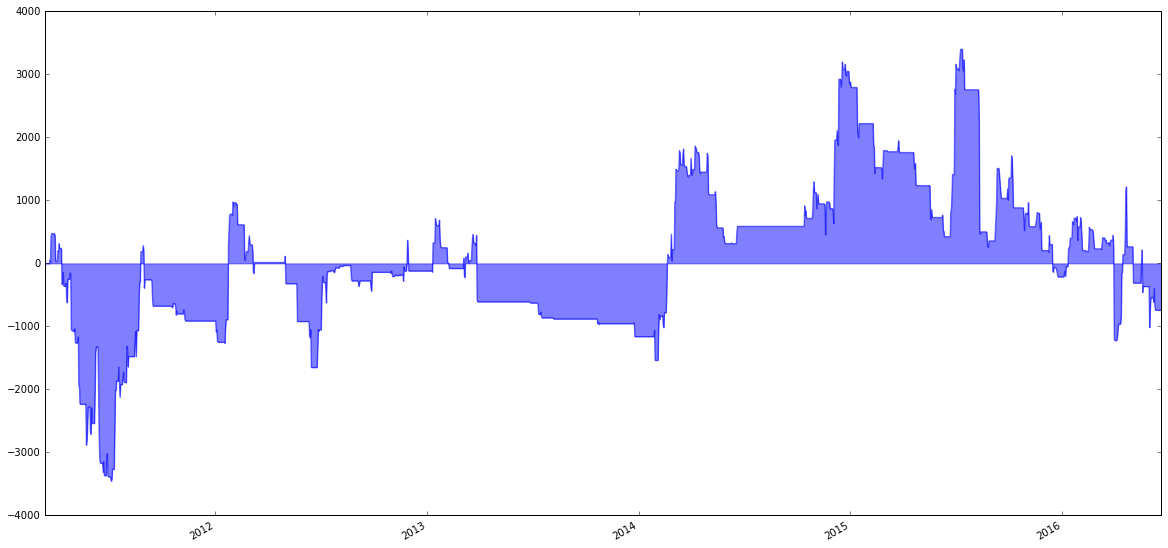

In [70]:
portfolio_stats(best_portfolio, 'Best')

Portfolio name --- Worst(reversed)


PriceChange Mod. Sharpe -0.013187958449096426
Netprofit -4048.5
Max DD -7625.75
Recovery Factor -0.530898600138
Profit factor 0.90913783623
Winrate 10.3228740337


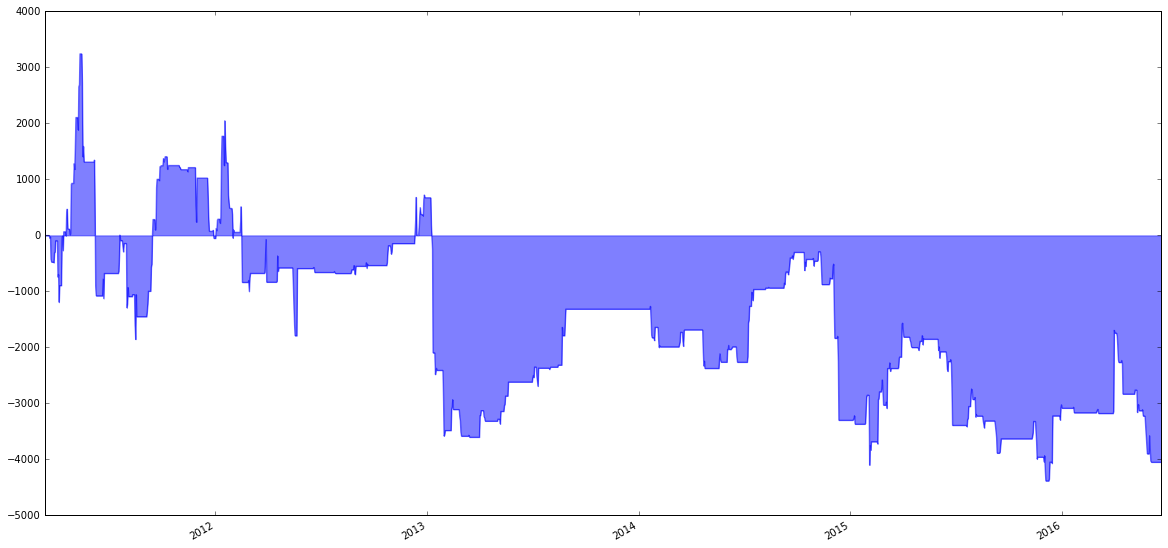

In [53]:
portfolio_stats(worst_portfolio, 'Worst(reversed)')

Portfolio name --- Summary(Best + Worst)


PriceChange Mod. Sharpe -0.014527453867509555
Netprofit -4788.5
Max DD -6055.25
Recovery Factor -0.790801370711
Profit factor 0.922739025384
Winrate 15.5525238745


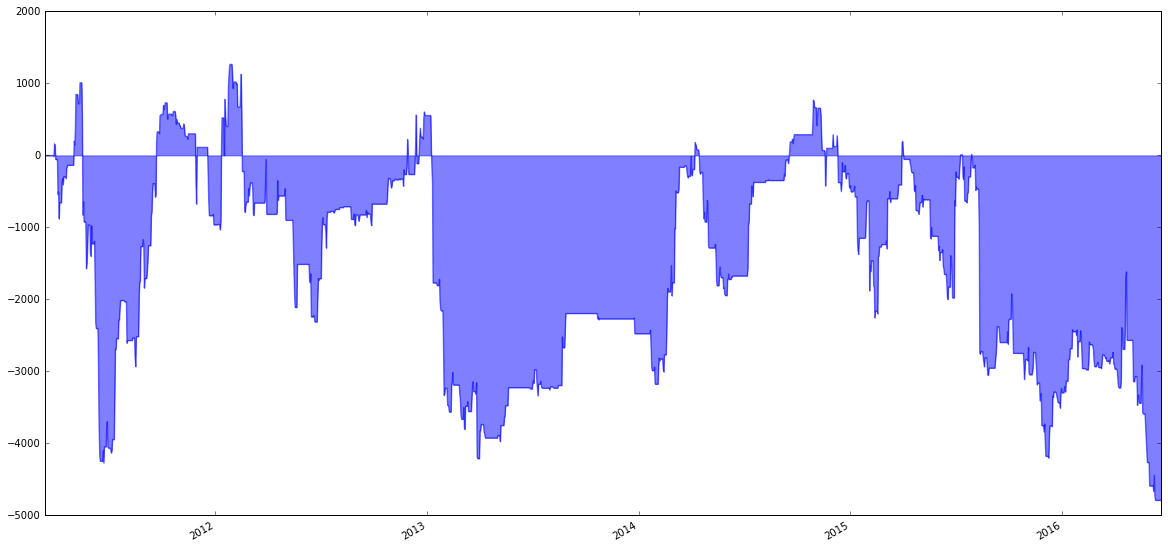

In [54]:
portfolio_stats(summary_portfolio, 'Summary(Best + Worst)')

Portfolio name --- Benchmark


PriceChange Mod. Sharpe -0.0038602154691646053
Netprofit -3480.5
Max DD -15282.25
Recovery Factor -0.22774787744
Profit factor 0.981071431485
Winrate 20.9640745794


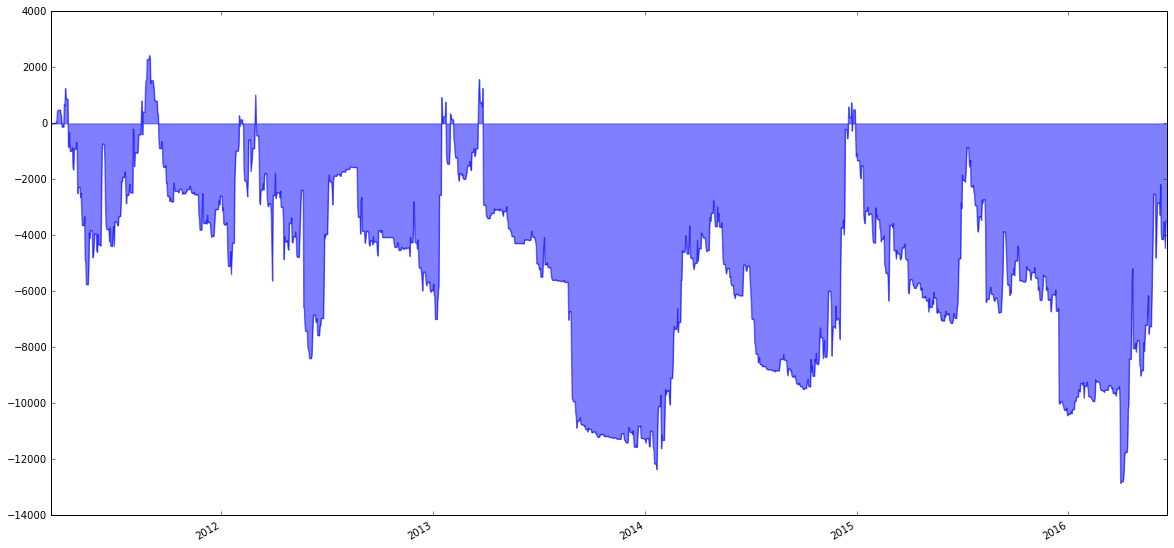

In [55]:
portfolio_stats(benchmark_portfolio, 'Benchmark')